# TP 4 : Analyse en composantes principales avec R

## Un esprit sain dans un corps sain

Ce sujet vous donne les moyens de conserver un esprit sain dans un corps sain. Dans un premier temps, il s'agira de prendre les mesures de ce corps à maintenir en forme (données `body.csv`). Pour cela, il est bien connu qu'une activité physique régulière est bénéfique à de nombreux de points de vue (données `athle.csv`) à condition de l'accompagner par une alimentation saine et équilibrée et ce, dès le petit déjeuner (données `cereal.txt`). Pour compléter le tout, un peu de réflexion mathématique mettra le cerveau au niveau de votre corps aguerri et bien alimenté !

## 1. Données `body`

Les données `body` sont composées d'un relevé de 5 variables morphologiques (tour d'épaule, tour de poitrine, tour de taille, masse et taille) chez 20 individus. La première étape consiste à importer ce jeu de données dans R avec la fonction `read.table()` (nous pourrions aussi utiliser `read.csv()` ou `read.csv2()`).

In [1]:
data_body <- read.table("data/body.csv", # Nom du fichier à importer
                        header=TRUE,     # Utiliser la première ligne du fichier pour les noms des colonnes
                        sep=";",         # Séparateur de champs
                        dec=",",         # Séparateur décimal
                        row.names=1)     # Utiliser la première colonne pour les noms des lignes

Pour calculer une ACP sur les données, nous pouvons utiliser la fonction `prcomp()`. Nous stockons le résultat retourné dans un objet appelé `acp_body` de notre espace de travail.

In [3]:
acp_body <- prcomp(data_body)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_body), "\n")
cat("Type de l'objet :", mode(acp_body), "\n")
cat("Test du type 'list' :", is.list(acp_body), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


Les composantes de l'objet `acp_body` sont visibles grâce à la fonction `names()`.

In [4]:
names(acp_body)

[1] "sdev"     "rotation" "center"   "scale"    "x"

Pour accéder à un de ces éléments, il faut utiliser l'opérateur `$`.

In [5]:
acp_body$sdev

[1] 15.989241  7.757795  4.846040  2.933938  2.002735

Une description détaillée des éléments contenue dans un objet de la classe `prcomp` est fournie dans l'aide de la fonction `prcomp()`.

In [6]:
help(prcomp)

prcomp                  package:stats                  R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs a principal components analysis on the given data matrix
     and returns the results as an object of class ‘prcomp’.

_U_s_a_g_e:

     prcomp(x, ...)
     
     ## S3 method for class 'formula'
     prcomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     prcomp(x, retx = TRUE, center = TRUE, scale. = FALSE,
            tol = NULL, rank. = NULL, ...)
     
     ## S3 method for class 'prcomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see ‘model.frame’)
          containing the variables in the formula ‘formula’.  By
          default the variables are taken from ‘environment(

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Que renvoie la fonction <code>summary()</code> appliquée à l'objet <code>acp_body</code> ?</li>
        <li>Utilisez la fonction <code>plot()</code> avec l'objet <code>acp_body</code> pour représenter l'éboulis des valeurs propres. Combien de dimensions semble-t-il raisonnable de retenir pour les représentations graphiques ?</li>
        <li>À l'aide de la fonction <code>biplot</code>, représenter simultanément les individus et les variables sur le premier plan principal (PC1-PC2). Commenter.</li>
        <li>Représenter seulement les individus dans le premier plan principal (voir l'attribut <code>x</code> de l'objet <code>acp_body</code>) avec un codage en 2 couleurs dépendant d'un facteur <code>sexe</code> (les 10 premiers individus étant des hommes, les 10 suivants des femmes) :<br>
            <center><img src="img/body_plan_principal.png"></center></li>
    </ol>
</div>

Importance of components:
                           PC1    PC2     PC3     PC4    PC5
Standard deviation     15.9892 7.7578 4.84604 2.93394 2.0027
Proportion of Variance  0.7264 0.1710 0.06673 0.02446 0.0114
Cumulative Proportion   0.7264 0.8974 0.96414 0.98860 1.0000

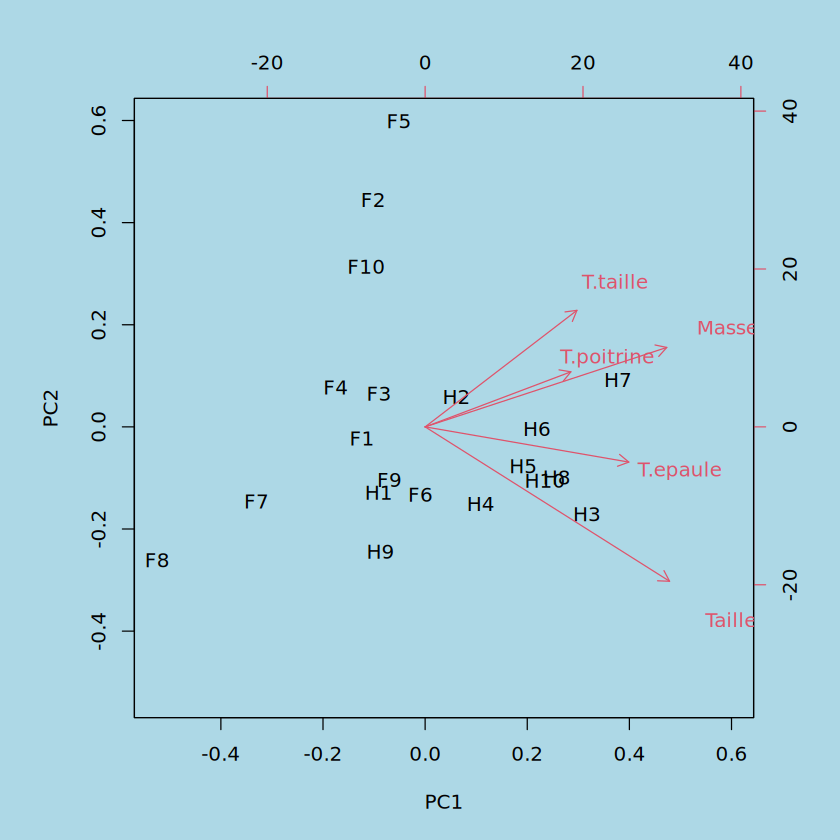

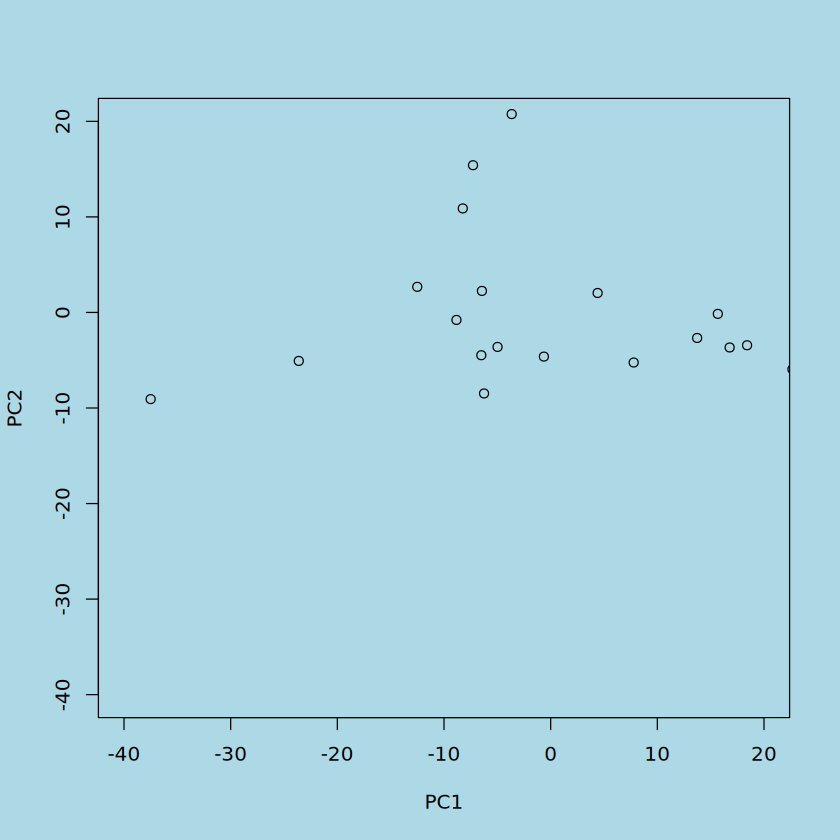

In [30]:
# À FAIRE
summary(acp_body)

par(bg = "lightblue")

#plot(acp_body) # 2 dimensions à garder

 biplot(acp_body)
# Masse et taille sont les plus grands en norme

plot(x = acp_body$x, xlim = c(-40, 20), ylim = c(-40, 20),)

## 2. Données `athle`

Les données `athle` sont constituées d'un relevé des records nationaux d'athlétisme en 2010 de 26 pays pour 9 épreuves de course, du 100m au marathon.

In [24]:
# Importation des données
data_athle <- read.table("data/athle.csv", header=TRUE, dec=",", row.names=1)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP sur ces données <code>data_athle</code>.</li>
        <li>Représenter l'éboulis des valeurs propres et le diagramme biplot. Commenter.</li>
        <li>Quel(s) pré-traitement(s) vous semble(nt) nécessaire(s) (transformation de données, suppression d'observations atypiques, ...) ? Effectuer quelques manipulations pour produire des résultats d'ACP plus parlants.</li>
    </ol>
</div>

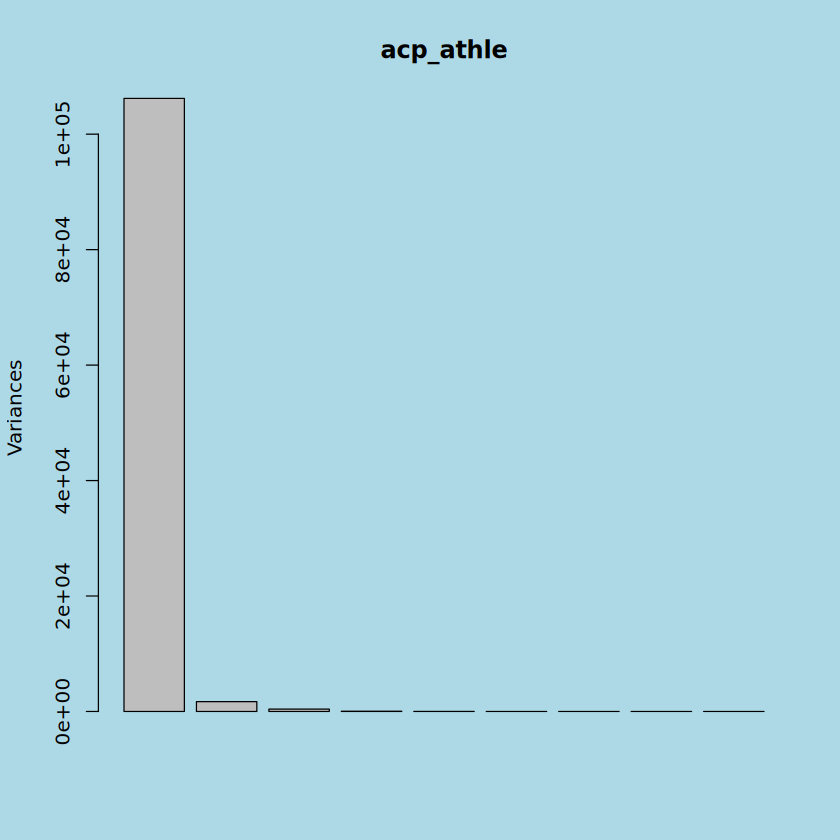

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“zero-length arrow is of indeterminate angle and so skipped”


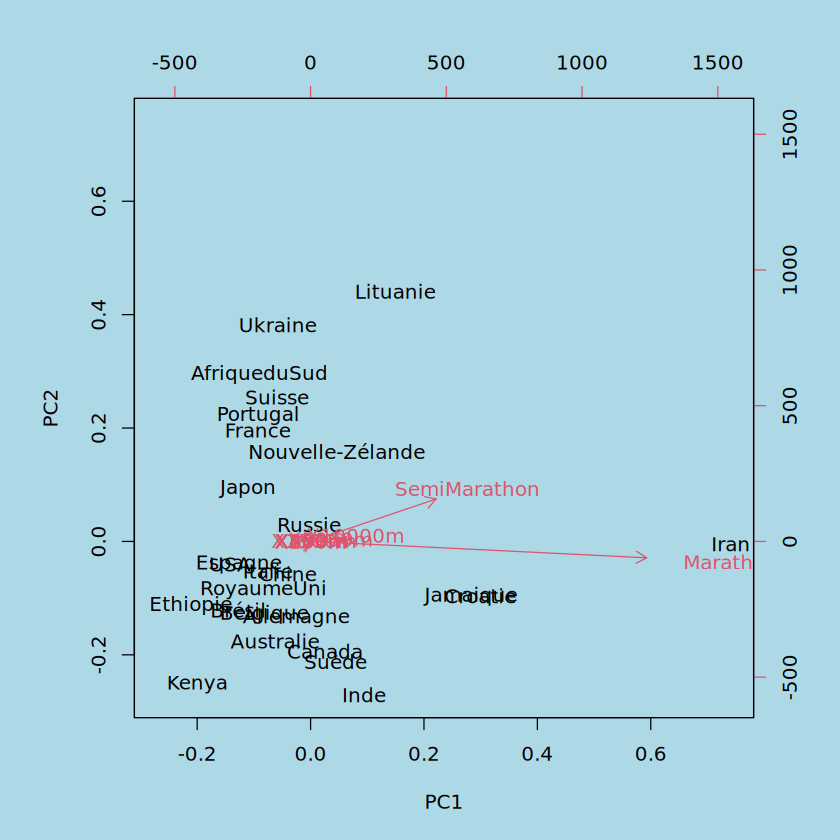

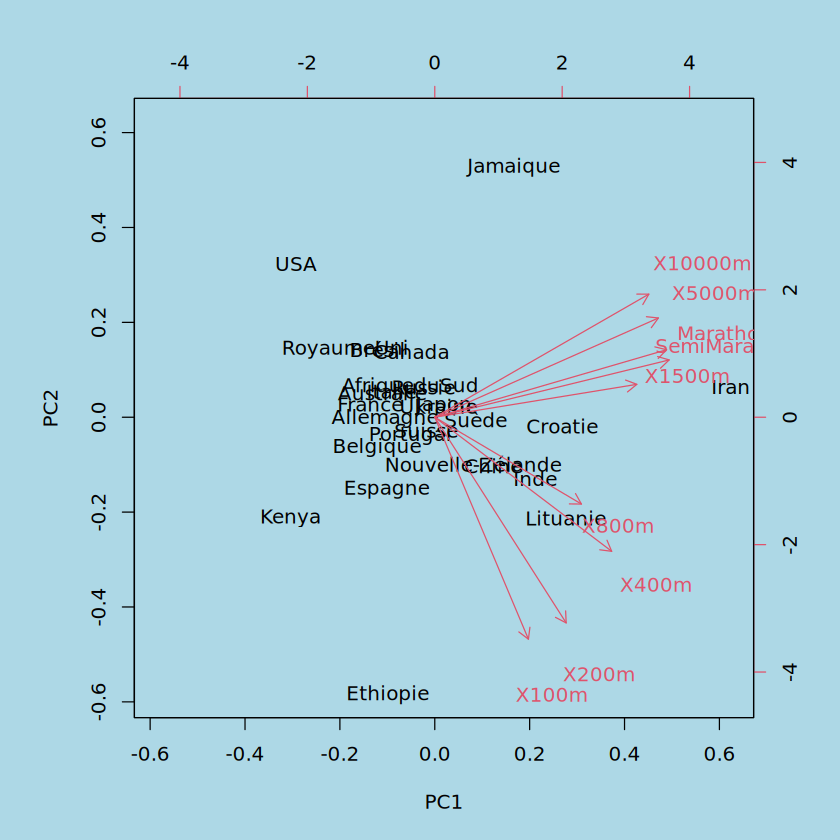

In [37]:
# À FAIRE

acp_athle <- prcomp(data_athle)

par(bg = "lightblue")
plot(acp_athle)

biplot(acp_athle)
# Damn y'a pas wesh, il faut normaliser le tout mon gaté

sc_athle <- prcomp(data_athle, scale. = TRUE)

biplot(sc_athle)


## 3. Données `cereal`

Les données `cereal` contiennent la composition (relevée en 1993 aux États-Unis) selon 9 variables quantitatives de 77 types de paquets de céréales consommés au petit-déjeuner. Le fabriquant (variable `mfr`) est également disponible dans le jeu de données.

  * `mfr` Manufacturer of cereal (A: American Home Food Products, G: General Mills, K: Kelloggs, N: Nabisco, P: Post, Q: Quaker Oats, R: Ralston Purina).
  * `calories` Calories per serving.
  * `protein` Grams of protein.
  * `fat` Grams of fat.
  * `sodium` Milligrams of sodium.
  * `fiber` Grams of dietary fiber.
  * `carbo` Grams of complex carbohydrates.
  * `sugars` Grams of sugars.
  * `potass` Milligrams of potassium.
  * `vitamins` Vitamins and minerals (0, 25 or 100, indicating the typical percentage of FDA recommended).

L'analyse de ce jeu de données a fait l'objet d'un concours proposé par l'*American Statistical Association* (sections *Statistical Computing* et *Statistical Graphics*) en 1993 sous le titre "*Serial Correlation or Cereal Correlation ?* " :

*Every two years the Section on Statistical Graphics sponsors a special exposition where one or more data sets are made available, analyzed by anyone interested and presented in a special poster session at the Annual Meeting.*

In [38]:
# Importation des données
data_cereal <- read.table("data/cereal.txt", header=TRUE, row.names=1)

In [ ]:
head(data_cereal)

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
100%_Bran,N,70,4,1,130,10.0,5.0,6,280,25
100%_Natural_Bran,Q,120,3,5,15,2.0,8.0,8,135,0
All-Bran,K,70,4,1,260,9.0,7.0,5,320,25
All-Bran_with_Extra_Fiber,K,50,4,0,140,14.0,8.0,0,330,25
Almond_Delight,R,110,2,2,200,1.0,14.0,8,90,25
Apple_Cinnamon_Cheerios,G,110,2,2,180,1.5,10.5,10,70,25


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("FactoMineR"):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages("FactoMineR"): unable to install packages


Plusieurs packages proposent des fonctions pour calculer une ACP en offrant d'autres options que celles proposées par la fonction `prcomp()`. Un package très populaire dédié à l'analyse exploratoire de données multivariées est [`FactoMineR`](http://factominer.free.fr/) qui est maintenu par une équipe française (d'où les noms français de certains éléments). Nous vous proposons d'utiliser ce package pour le jeu de données `cereal`.

In [41]:
# Chargement du package FactoMineR
library(FactoMineR)

ERROR: Error in library(FactoMineR): there is no package called ‘FactoMineR’


Le calcul de l'ACP se fait avec la fonction `PCA()` et nous pouvons utiliser l'argument `quali.sup=` pour omettre les variables qualitatives (`FactoMineR` parle de *variable supplémentaire*).

In [ ]:
# Calcul de l'ACP
acp_cereal <- PCA(data_cereal, quali.sup=1)

La fonction `plot()` affiche le résultat dans le plan principal pour représenter les individus (`choix="ind"`) ou les variables (`choix="var"`).

In [ ]:
# Représentation des variables dans le plan principal
plot(acp_cereal, choix="var")

In [ ]:
# Représentation des individus dans le plan principal en codant en couleur le fabriquant (colonne 1)
plot(acp_cereal, choix="ind", habillage=1)

<div class="alert alert-block alert-success">
    Pour suivre la recommandation <i>"Ne mange pas trop gras, trop salé, trop sucré"</i>, quelle(s) céréale(s) vaut-il mieux consommer ? Dans quelle zones du graphique de l'ACP se trouvent les céréales à éviter ?
</div>

## 4. Aspects mathématiques

Nous allons travailler avec une matrice à 5 lignes et 3 colonnes dont les éléments sont issus d'un tirage aléatoire sans remise d'entiers entre 1 et 15.

In [110]:
X <- matrix(sample(1:15, size=15), ncol=3)

Nous commençons par calculer l'ACP et représenter le diagramme biplot.

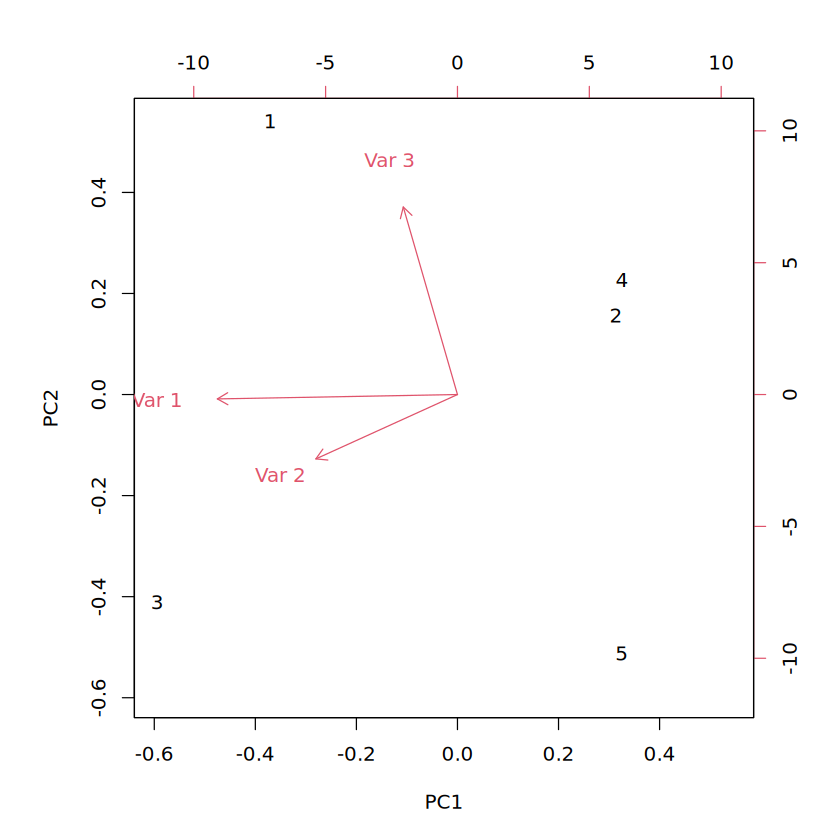

In [ ]:
acp <- prcomp(X)
par(bg = "white")
biplot(acp)

L'objectif des manipulations suivantes consiste à retrouver les valeurs issues de l'ACP présentes dans les composants de l'objet `acp` ou dans le résumé de l'objet obtenu avec la fonction `summary()`.

In [112]:
acp

Standard deviations (1, .., p=3):
[1] 6.019148 4.203575 3.130465

Rotation (n x k) = (3 x 3):
            PC1         PC2        PC3
[1,] -0.8455470 -0.02205987 -0.5334450
[2,] -0.4986409 -0.32444901  0.8037973
[3,] -0.1908074  0.94564592  0.2633369

In [113]:
summary(acp)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     6.0191 4.2036 3.1305
Proportion of Variance 0.5688 0.2774 0.1538
Cumulative Proportion  0.5688 0.8462 1.0000

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Une ACP étant une diagonalisation de la matrice de covariance, vérifier que les informations renvoyées par <code>prcomp()</code> sont similaires à celles calculées par la fonction <code>eigen()</code>. Commenter les différences si il y en a.</li>
        <li>Où retrouve-t-on les vecteurs propres renvoyés par <code>eigen()</code> dans l'objet <code>acp</code> ? Le signe de ces vecteurs est-il important ?</li>
        <li>Retrouver les résultats de l'ACP en procédant cette fois à la décomposition en valeurs singulières (fonction <code>svd()</code>) stockée dans un objet <code>s</code>.</li>
        <li>Vérifier que les vecteurs singuliers à droite (<code>s&dollar;v</code>) sont bien similaires au composant <code>rotation</code> du résultat de <code>prcomp()</code> et également aux vecteurs propres de la matrice de covariance (éventuellement au signe près).</li>
        <li>Concernant les valeurs singulières, vérifier que l'on retrouve les écarts-types renvoyés par <code>prcomp()</code> et les racines carrées des valeurs propres de la matrice de covariance.</li>
        <li>Retrouver les coordonnées des individus sur les composantes principales données par <code>acp&dollar;x</code>. Pour cela, nous pouvons par exemple faire le produit matriciel des données initiales et des vecteurs propres de la matrice de covariance.</li>
        <li>Procéder à des calculs analogues pour vérifier les calculs d'une ACP réduite (diagonalisation de la matrice des corrélations).</li>
    </ol>
</div>

In [ ]:
# À FAIRE
scX <- scale(X, center = TRUE, scale = TRUE)

X <- scale(X)
covX <- cov(scX)

eig <- eigen(covX)

s <- svd(covX)
#s

#s$v
#acp$rotation

#5 c'est bon
"acp$sdev
sqrt(eig$values)
sqrt(s$d)
"

#6
acp_sc <- prcomp(X, scale = TRUE)
coord <- scX %*% eig$vectors 
coord
acp_sc$x

[1] "acp$sdev\nsqrt(eig$values)\nsqrt(s$d)\n"

1.1896106,1.1944720,-0.4337876
-1.1864154,0.3741157,0.8704818
1.4854769,-0.9020032,0.5647295
-0.8245229,0.4982520,-0.2793723
-0.6641492,-1.1648364,-0.7220515


PC1,PC2,PC3
-1.1896106,-1.1944720,-0.4337876
1.1864154,-0.3741157,0.8704818
-1.4854769,0.9020032,0.5647295
0.8245229,-0.4982520,-0.2793723
0.6641492,1.1648364,-0.7220515


## 4. PCR vs PLS

Les but ici est de comparer les deux approches sur le jeux de données `DatairSDD`. Ce jeux de données contient des informations relative à la qualité de l'air. 
On cherche à expliquer la densité de monoxyne d'azote en fonction des autres variables. On comparera alors plusieurs méthodes de régression.

In [131]:
install.packages("pls")
library("pls")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("pls"):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages("pls"): unable to install packages


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Ajuster un modèle linéaire. </li>
        <li> Effectuer un régression en composante principale avec la fonction <code>pcr()</code>. </li>
        <li> Effectuer une regression PLS avec la fonction <code>plsr()</code>. </li>
        <li> Comparer les erreurs de ces trois modèles en termes d'erreur quadratique moyenne en fonction de nombre de composantes utilisées. <code>RMESP()</code> </li>
    </ol>
</div>

In [ ]:
# À FAIRE